In [1]:
import pandas as pd
import statistics 
import calendar

sex_ratio = pd.read_csv("Sex_Ratio_90-06.csv", delimiter = ',')
sex_ratio.rename(columns={'Year(s)':'Year', 'Value':'Sex Ratio'}, inplace = True)
sex_ratio['Year'] = sex_ratio['Year'].astype(int)

In [2]:
months = pd.read_csv("World_1990-2006.csv", delimiter = ',').drop(['Value Footnotes'], axis=1)
months = months[~months['Month'].isin(['Unknown','January - March','April - June','July - September','October - December','Total'])].dropna()
months.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', inplace=True)
months.rename(columns={'Value':'Births', 'Month':'birth_month'}, inplace = True)
months['Year'] = months['Year'].astype(int)

together = pd.merge(sex_ratio,months,on=['Country or Area','Year']).drop_duplicates()
together = together.drop_duplicates(subset = ['Country or Area','Year', 'birth_month'],
                                    keep = 'last').reset_index(drop = True)

countries = together['Country or Area'].unique().tolist()
years = together['Year'].unique().tolist()
together['Total'] = 0

for i in countries:
    for j in years:
        year = together[((together['Country or Area'] == i) & (together['Year'] == j))]
        if len(year) != 12:
            together = together.drop(together[(together['Country or Area'] == i) & (together['Year'] == j)].index).reset_index(drop = True)
#         if year.empty:
#             pass
#         elif len(year) != 12:
#             avg = year['Births'].mean()
#             total_avg = avg*12
#             together.loc[(together['Country or Area'] == i) & (together['Year'] == j), 'Total'] = round(total_avg)
#             print(i, j, len(year))
        else:
            ye = year['Births'].sum()
            together.loc[(together['Country or Area'] == i) & (together['Year'] == j), 'Total'] = ye                   
together

,Country or Area,Year,Sex Ratio,birth_month,Births,Total
0,Albania,2006,112.9,January,3191.0,34229
1,Albania,2006,112.9,February,2621.0,34229
2,Albania,2006,112.9,March,2815.0,34229
3,Albania,2006,112.9,April,2733.0,34229
4,Albania,2006,112.9,May,3268.0,34229
...,...,...,...,...,...,...
16603,Venezuela (Bolivarian Republic of),1990,105.7,August,48110.0,577876
16604,Venezuela (Bolivarian Republic of),1990,105.7,September,52533.0,577876
16605,Venezuela (Bolivarian Republic of),1990,105.7,October,52802.0,577876
16606,Venezuela (Bolivarian Republic of),1990,105.7,November,50465.0,577876


In [3]:
together[(together['Country or Area']=='Jamaica') & (together['Year']==1997)]

,Country or Area,Year,Sex Ratio,birth_month,Births,Total


In [4]:
test = sex_ratio['Sex Ratio']/100
test.describe()

count    4862.000000
mean        1.053776
std         0.022129
min         0.967000
25%         1.040000
50%         1.052000
75%         1.064000
max         1.178000
Name: Sex Ratio, dtype: float64

<Axes: ylabel='Density'>

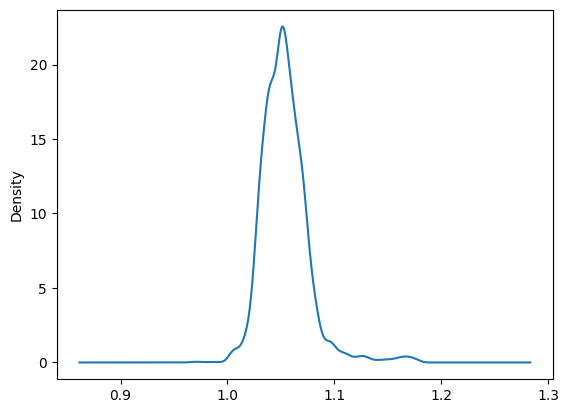

In [5]:
test.plot(kind='kde')

The data/plot suggests that there is a small variation around the mean sex ratio. The relatively small standard deviation (0.0195) further indicates that the values in the "Sex Ratio" column are clustered around the mean. The majority of the data falling within a narrow range (1.058772 +/- 0.019533) indicates consistency in the sex ratio values.

In [6]:
together['Male Births'] = together['Sex Ratio'] * together['Births'] / 200
together['Male Total'] = together['Sex Ratio'] * together['Total'] / 200
together['Male Birth Rate'] = (together['Male Births'] / together['Male Total'])

together

,Country or Area,Year,Sex Ratio,birth_month,Births,Total,Male Births,Male Total,Male Birth Rate
0,Albania,2006,112.9,January,3191.0,34229,1801.3195,19322.2705,0.093225
1,Albania,2006,112.9,February,2621.0,34229,1479.5545,19322.2705,0.076572
2,Albania,2006,112.9,March,2815.0,34229,1589.0675,19322.2705,0.082240
3,Albania,2006,112.9,April,2733.0,34229,1542.7785,19322.2705,0.079845
4,Albania,2006,112.9,May,3268.0,34229,1844.7860,19322.2705,0.095475
...,...,...,...,...,...,...,...,...,...
16603,Venezuela (Bolivarian Republic of),1990,105.7,August,48110.0,577876,25426.1350,305407.4660,0.083253
16604,Venezuela (Bolivarian Republic of),1990,105.7,September,52533.0,577876,27763.6905,305407.4660,0.090907
16605,Venezuela (Bolivarian Republic of),1990,105.7,October,52802.0,577876,27905.8570,305407.4660,0.091373
16606,Venezuela (Bolivarian Republic of),1990,105.7,November,50465.0,577876,26670.7525,305407.4660,0.087328


In [7]:
together[(together['Country or Area']=='Jamaica') & (together['Year']==1997)]

,Country or Area,Year,Sex Ratio,birth_month,Births,Total,Male Births,Male Total,Male Birth Rate


In [8]:
almost = together.drop(['Total','Sex Ratio','Births','Male Births','Male Total'], axis=1)
almost

,Country or Area,Year,birth_month,Male Birth Rate
0,Albania,2006,January,0.093225
1,Albania,2006,February,0.076572
2,Albania,2006,March,0.082240
3,Albania,2006,April,0.079845
4,Albania,2006,May,0.095475
...,...,...,...,...
16603,Venezuela (Bolivarian Republic of),1990,August,0.083253
16604,Venezuela (Bolivarian Republic of),1990,September,0.090907
16605,Venezuela (Bolivarian Republic of),1990,October,0.091373
16606,Venezuela (Bolivarian Republic of),1990,November,0.087328


In [9]:
final = almost[['birth_month', 'Male Birth Rate']].groupby(['birth_month']).mean().reset_index().rename(columns={"Male Birth Rate": "Average Male Birth Rate"})
final

,birth_month,Average Male Birth Rate
0,April,0.080650
1,August,0.085894
2,December,0.081947
3,February,0.077395
4,January,0.084697
5,July,0.085976
6,June,0.081252
7,March,0.083897
8,May,0.084073
9,November,0.081312


In [10]:
testing = almost[['birth_month', 'Country or Area', 'Male Birth Rate']].groupby(['birth_month', 'Country or Area']).mean().reset_index()

for i in countries:
    test = testing[testing['Country or Area'] == i]['Male Birth Rate'].sum()
    if (test < 0.99999999999) | (test > 1.0000000001):
        print(i, test)

In [11]:
final['birth_month'] = final['birth_month'].str[:3]

final["birth_month"] = pd.to_datetime(final.birth_month, format='%b', errors='coerce').dt.month
final = final.sort_values(by="birth_month")
final['birth_month'] = final['birth_month'].apply(lambda x: calendar.month_abbr[x])
final

,birth_month,Average Male Birth Rate
4,Jan,0.084697
3,Feb,0.077395
7,Mar,0.083897
0,Apr,0.080650
8,May,0.084073
6,Jun,0.081252
5,Jul,0.085976
1,Aug,0.085894
11,Sep,0.087022
10,Oct,0.085887


In [12]:
final['Average Male Birth Rate'].sum()

1.0

In [13]:
final.to_csv('World_Avg_Male_br.csv')

In [14]:
It_month = pd.read_csv('Italy_month_90-06.csv').drop(['Country or Area', 'Value Footnotes'], axis=1)
It_sr = pd.read_csv('Italy_90-06.csv').drop(['Country or Area'], axis=1)

It_month.rename(columns={'Value':'Births','Month':'birth_month'}, inplace=True)
It_month = It_month[(It_month.birth_month != 'Total') & (It_month.birth_month != 'Unknown')]
It_sr.rename(columns={'Year(s)':'Year', 'Value':'Sex Ratio'}, inplace = True)

It = pd.merge(It_sr, It_month, on='Year')

years = It['Year'].unique().tolist()
It['Total'] = 0
for j in years:
    year = It[It['Year'] == j]
    if year.empty:
        pass
    else:
        ye = year['Births'].sum()
        It.loc[It['Year'] == j, 'Total'] = ye      

It['Male Births'] = It['Sex Ratio'] * It['Births'] / 200
It['Male Total'] = It['Sex Ratio'] * It['Total'] / 200
It['Male Birth Rate'] = (It['Male Births'] / It['Male Total'])

new_It = It.drop(['Total','Sex Ratio','Births','Male Births'], axis=1)
final_It = new_It[['birth_month', 'Male Birth Rate']].groupby(['birth_month']).mean().reset_index().rename(columns={"Male Birth Rate": "Average Male Birth Rate"})

final_It['birth_month'] = final_It['birth_month'].str[:3]

final_It["birth_month"] = pd.to_datetime(final_It.birth_month, format='%b', errors='coerce').dt.month
final_It = final_It.sort_values(by="birth_month")
final_It['birth_month'] = final_It['birth_month'].apply(lambda x: calendar.month_abbr[x])
final_It

,birth_month,Average Male Birth Rate
4,Jan,0.082130
3,Feb,0.073461
7,Mar,0.081162
0,Apr,0.078162
8,May,0.086291
6,Jun,0.083671
5,Jul,0.090753
1,Aug,0.087008
11,Sep,0.089030
10,Oct,0.087035


In [15]:
final_It['Average Male Birth Rate'].sum()

1.0

In [16]:
final_It.to_csv('Italy_Avg_Male_br.csv')

In [17]:
Sp_month = pd.read_csv('Spain_month_90-06.csv').drop(['Country or Area', 'Value Footnotes'], axis=1)
Sp_sr = pd.read_csv('Spain_90-06.csv').drop(['Country or Area'], axis=1)

Sp_month.rename(columns={'Value':'Births','Month':'birth_month'}, inplace=True)
Sp_month = Sp_month[(Sp_month.birth_month != 'Total') & (Sp_month.birth_month != 'Unknown')]
Sp_sr.rename(columns={'Year(s)':'Year', 'Value':'Sex Ratio'}, inplace = True)

Sp = pd.merge(Sp_sr, Sp_month, on='Year')

years = Sp['Year'].unique().tolist()
Sp['Total'] = 0
for j in years:
    year = Sp[Sp['Year'] == j]
    if year.empty:
        pass
    else:
        ye = year['Births'].sum()
        Sp.loc[Sp['Year'] == j, 'Total'] = ye      

Sp['Male Births'] = Sp['Sex Ratio'] * Sp['Births'] / 200
Sp['Male Total'] = Sp['Sex Ratio'] * Sp['Total'] / 200
Sp['Male Birth Rate'] = (Sp['Male Births'] / Sp['Male Total'])

new_Sp = Sp.drop(['Total','Sex Ratio','Births','Male Births'], axis=1)
final_Sp = new_Sp[['birth_month', 'Male Birth Rate']].groupby(['birth_month']).mean().reset_index().rename(columns={"Male Birth Rate": "Average Male Birth Rate"})

final_Sp['birth_month'] = final_Sp['birth_month'].str[:3]

final_Sp["birth_month"] = pd.to_datetime(final_Sp.birth_month, format='%b', errors='coerce').dt.month
final_Sp = final_Sp.sort_values(by="birth_month")
final_Sp['birth_month'] = final_Sp['birth_month'].apply(lambda x: calendar.month_abbr[x])
final_Sp

,birth_month,Average Male Birth Rate
4,Jan,0.083089
3,Feb,0.076024
7,Mar,0.084115
0,Apr,0.082484
8,May,0.085995
6,Jun,0.081046
5,Jul,0.085820
1,Aug,0.083681
11,Sep,0.085808
10,Oct,0.085965


In [18]:
final_Sp['Average Male Birth Rate'].sum()

1.0

In [19]:
final_Sp.to_csv('Spain_Avg_Male_br.csv')

In [20]:
UK_month = pd.read_csv('UK_month_90-06.csv').drop(['Country or Area', 'Value Footnotes'], axis=1)
UK_sr = pd.read_csv('UK_90-06.csv').drop(['Country or Area'], axis=1)

UK_month.rename(columns={'Value':'Births','Month':'birth_month'}, inplace=True)
UK_month = UK_month[~UK_month['birth_month'].isin(['Unknown','January - March','April - June','July - September','October - December','Total'])].dropna()
UK_sr.rename(columns={'Year(s)':'Year', 'Value':'Sex Ratio'}, inplace = True)
UK_month['Year'] = UK_month['Year'].astype(int)

UK = pd.merge(UK_sr, UK_month, on='Year')

years = UK['Year'].unique().tolist()
UK['Total'] = 0
for j in years:
    year = UK[UK['Year'] == j]
    if year.empty:
        pass
    else:
        ye = year['Births'].sum()
        UK.loc[UK['Year'] == j, 'Total'] = ye      

UK['Male Births'] = UK['Sex Ratio'] * UK['Births'] / 200
UK['Male Total'] = UK['Sex Ratio'] * UK['Total'] / 200
UK['Male Birth Rate'] = (UK['Male Births'] / UK['Male Total'])

new_UK = UK.drop(['Total','Sex Ratio','Births','Male Births'], axis=1)
final_UK = new_UK[['birth_month', 'Male Birth Rate']].groupby(['birth_month']).mean().reset_index().rename(columns={"Male Birth Rate": "Average Male Birth Rate"})

final_UK['birth_month'] = final_UK['birth_month'].str[:3]

final_UK["birth_month"] = pd.to_datetime(final_UK.birth_month, format='%b', errors='coerce').dt.month
final_UK = final_UK.sort_values(by="birth_month")
final_UK['birth_month'] = final_UK['birth_month'].apply(lambda x: calendar.month_abbr[x])
final_UK

,birth_month,Average Male Birth Rate
4,Jan,0.083625
3,Feb,0.076601
7,Mar,0.083990
0,Apr,0.081531
8,May,0.085259
6,Jun,0.084105
5,Jul,0.087714
1,Aug,0.085546
11,Sep,0.085446
10,Oct,0.085079


In [21]:
final_UK['Average Male Birth Rate'].sum()

1.0

In [22]:
final_UK.to_csv('UK_Avg_Male_br.csv')

In [23]:
US_month = pd.read_csv('US_month_90-06.csv').drop(['Country or Area', 'Value Footnotes'], axis=1)
US_sr = pd.read_csv('US_90-06.csv').drop(['Country or Area'], axis=1)

US_month.rename(columns={'Value':'Births','Month':'birth_month'}, inplace=True)
US_month = US_month[~US_month['birth_month'].isin(['Unknown','January - March','April - June','July - September','October - December','Total'])].dropna()
US_sr.rename(columns={'Year(s)':'Year', 'Value':'Sex Ratio'}, inplace = True)
US_month['Year'] = US_month['Year'].astype(int)

US = pd.merge(US_sr, US_month, on='Year')

years = US['Year'].unique().tolist()
US['Total'] = 0
for j in years:
    year = US[US['Year'] == j]
    if year.empty:
        pass
    else:
        ye = year['Births'].sum()
        US.loc[US['Year'] == j, 'Total'] = ye      

US['Male Births'] = US['Sex Ratio'] * US['Births'] / 200
US['Male Total'] = US['Sex Ratio'] * US['Total'] / 200
US['Male Birth Rate'] = (US['Male Births'] / US['Male Total'])

new_US = US.drop(['Total','Sex Ratio','Births','Male Births'], axis=1)
final_US = new_US[['birth_month', 'Male Birth Rate']].groupby(['birth_month']).mean().reset_index().rename(columns={"Male Birth Rate": "Average Male Birth Rate"})

final_US['birth_month'] = final_US['birth_month'].str[:3]

final_US["birth_month"] = pd.to_datetime(final_US.birth_month, format='%b', errors='coerce').dt.month
final_US = final_US.sort_values(by="birth_month")
final_US['birth_month'] = final_US['birth_month'].apply(lambda x: calendar.month_abbr[x])
final_US

,birth_month,Average Male Birth Rate
4,Jan,0.081042
3,Feb,0.075753
7,Mar,0.083991
0,Apr,0.080224
8,May,0.084659
6,Jun,0.083278
5,Jul,0.087674
1,Aug,0.088451
11,Sep,0.086815
10,Oct,0.084747


In [24]:
final_US['Average Male Birth Rate'].sum()

1.0

In [25]:
final_US.to_csv('US_Avg_Male_br.csv')

In [26]:
arg_month = pd.read_csv('Arg_month_17-20.csv').drop(['Country or Area', 'Value Footnotes'], axis=1)
arg_sr = pd.read_csv('Arg_17-20.csv').drop(['Country or Area'], axis=1)

arg_month.rename(columns={'Value':'Births','Month':'birth_month'}, inplace=True)
arg_month = arg_month[~arg_month['birth_month'].isin(['Unknown','January - March','April - June','July - September','October - December','Total'])].dropna()
arg_sr.rename(columns={'Year(s)':'Year', 'Value':'Sex Ratio'}, inplace = True)
arg_month['Year'] = arg_month['Year'].astype(int)

arg = pd.merge(arg_sr, arg_month, on='Year')

years = arg['Year'].unique().tolist()
arg['Total'] = 0
for j in years:
    year = arg[arg['Year'] == j]
    if year.empty:
        pass
    else:
        ye = year['Births'].sum()
        arg.loc[arg['Year'] == j, 'Total'] = ye      

arg['Male Births'] = arg['Sex Ratio'] * arg['Births'] / 200
arg['Male Total'] = arg['Sex Ratio'] * arg['Total'] / 200
arg['Male Birth Rate'] = (arg['Male Births'] / arg['Male Total'])

new_arg = arg.drop(['Total','Sex Ratio','Births','Male Births'], axis=1)
final_arg = new_arg[['birth_month', 'Male Birth Rate']].groupby(['birth_month']).mean().reset_index().rename(columns={"Male Birth Rate": "Average Male Birth Rate"})

final_arg['birth_month'] = final_arg['birth_month'].str[:3]

final_arg["birth_month"] = pd.to_datetime(final_arg.birth_month, format='%b', errors='coerce').dt.month
final_arg = final_arg.sort_values(by="birth_month")
final_arg['birth_month'] = final_arg['birth_month'].apply(lambda x: calendar.month_abbr[x])
final_arg

,birth_month,Average Male Birth Rate
4,Jan,0.089450
3,Feb,0.081988
7,Mar,0.091512
0,Apr,0.088280
8,May,0.088404
6,Jun,0.082949
5,Jul,0.083173
1,Aug,0.081774
11,Sep,0.079993
10,Oct,0.078911


In [27]:
final_arg['Average Male Birth Rate'].sum()

0.9999999999999999

In [28]:
final_arg.to_csv('Arg_Avg_Male_br.csv')

In [29]:
bra = pd.read_csv('Bra_2003-2006.csv')

bra

,Year,birth_month,Sex,Births
0,2003,Total,Total,2822462
1,2003,Total,Male,1445825
2,2003,Total,Female,1376039
3,2003,January,Total,242832
4,2003,January,Male,124890
...,...,...,...,...
151,2006,November,Male,104201
152,2006,November,Female,99584
153,2006,December,Total,204312
154,2006,December,Male,104857


In [30]:
male_bra = bra[(bra.Sex != 'Female') & (bra.Sex != 'Total') & (bra.birth_month != 'Total')]

years = male_bra['Year'].unique().tolist()
for j in years:
    year = male_bra[male_bra['Year'] == j]
    ye = year['Births'].sum()
    male_bra.loc[bra['Year'] == j, 'Total'] = ye      

male_bra['Male Birth Rate'] = (male_bra['Births'] / male_bra['Total'])

new_bra = male_bra.drop(['Total','Sex','Births'], axis=1)
final_bra = new_bra[['birth_month', 'Male Birth Rate']].groupby(['birth_month']).mean().reset_index().rename(columns={"Male Birth Rate": "Average Male Birth Rate"})

final_bra['birth_month'] = final_bra['birth_month'].str[:3]

final_bra["birth_month"] = pd.to_datetime(final_bra.birth_month, format='%b', errors='coerce').dt.month
final_bra = final_bra.sort_values(by="birth_month")
final_bra['birth_month'] = final_bra['birth_month'].apply(lambda x: calendar.month_abbr[x])
final_bra

/var/folders/08/f0gkj3cx58d1cxy80qf50nhw0000gn/T/ipykernel_91648/3640045917.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_bra.loc[bra['Year'] == j, 'Total'] = ye
/var/folders/08/f0gkj3cx58d1cxy80qf50nhw0000gn/T/ipykernel_91648/3640045917.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_bra['Male Birth Rate'] = (male_bra['Births'] / male_bra['Total'])


,birth_month,Average Male Birth Rate
4,Jan,0.085050
3,Feb,0.081336
7,Mar,0.093516
0,Apr,0.090372
8,May,0.092722
6,Jun,0.086018
5,Jul,0.084453
1,Aug,0.082278
11,Sep,0.081723
10,Oct,0.077681


In [31]:
final_bra['Average Male Birth Rate'].sum()

1.0

In [32]:
final_bra.to_csv('Bra_Avg_Male_br.csv')